In [1]:
import os
project_dir = "c:/Users/sqin34/OneDrive - UW-Madison/Research/solvgnn/"
os.chdir(project_dir)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def cum_err(output,n_bin=1000):
    output['err1'] = np.abs(output['true_gam1'] - output['pred_gam1'])
    output['err2'] = np.abs(output['true_gam2'] - output['pred_gam2'])
    output['err'] = (output['err1']+output['err2'])/2
    values,base = np.histogram(output['err'],bins=n_bin)
    cumulative = np.cumsum(values)/np.sum(values)
    return [base,cumulative]

In [4]:
saved_model_dir_solvcat_bi = project_dir + "results/job_220822_solvcat_binary_with_inf_catx_randflip/"
saved_model_dir_solvgcn_bi = project_dir + "results/job_220814_solvgcn_binary_with_inf_catx/"
saved_model_dir_solvgnn_bi = project_dir + "results/job_220812_solvgnn_binary_with_inf_catx/"

In [8]:
solvcat_bi = pd.read_csv(saved_model_dir_solvcat_bi + "analysis/output_cv.csv")
solvgcn_bi = pd.read_csv(saved_model_dir_solvgcn_bi + "analysis/output_cv.csv")
solvgnn_bi = pd.read_csv(saved_model_dir_solvgnn_bi + "analysis/output_cv.csv")

c:\Users\sqin34\miniconda3\envs\solvgnn\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [13]:
solvgnn_bi["err1"] = np.abs(solvgnn_bi["true_gam1"] - solvgnn_bi["pred_gam1"])
solvgnn_bi["err2"] = np.abs(solvgnn_bi["true_gam2"] - solvgnn_bi["pred_gam2"])
solvgnn_bi["err"] = (solvgnn_bi["err1"] + solvgnn_bi["err2"])/2

In [15]:
solvgnn_bi.err.mean()

0.033058485487082005

In [19]:
mixture_type_err = []
for i in range(3):
    err = solvgnn_bi[solvgnn_bi.tpsa_binary_avg==i].err.mean()
    mixture_type_err.append(err)
    print(err)
print(np.std(np.array(mixture_type_err)))

0.020244487470171102
0.030382788966235835
0.035961140034454726
0.006505692598638435


In [20]:
conc_type_err = []
for i in [(0.1, 0.9), (0.5, 0.5)]:
    err = solvgnn_bi[(solvgnn_bi.solv1_x==i[0]) | (solvgnn_bi.solv1_x==i[1])].err.mean()
    conc_type_err.append(err)
    print(err)
print(np.std(np.array(conc_type_err)))

0.03160437473694683
0.025367889760511072
0.003118242488217878


In [15]:
labels = ['SolvCAT','SolvGCN','SolvGNN']
linestyles = ['dotted','dashed','solid']

In [16]:
plt.rcParams.update({
    'text.usetex': True,
    'font.family':'serif',
    'font.serif':['Computer Modern'],
    'axes.labelsize':10,
    'xtick.labelsize':9,
    'ytick.labelsize':9})

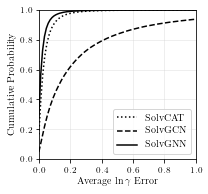

In [18]:
fig,ax = plt.subplots(figsize=(3,2.8))
ax.grid(color='lightgray',linewidth=0.75,alpha=0.5)
gnn_arch = [solvcat_bi,solvgcn_bi,solvgnn_bi]
for i,output in enumerate(gnn_arch):
    base,cumulative = cum_err(output)
    ax.plot(base[:-1],cumulative,label=labels[i],linestyle=linestyles[i],c='black')
ax.set_xlim((0,1))
ax.set_ylim((0,1))
ax.set_xlabel('Average $\ln\gamma$ Error')
ax.set_ylabel('Cumulative Probability')
plt.legend()
plt.tight_layout()
plt.savefig(saved_model_dir_solvgnn_bi + '/analysis/model_cumfreq_comparison_overlay.svg',pad_inches=0,dpi=400,transparent=True)   